<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRUPO B01
## Julia Callaba Blázquez
## Ines Agudo

Con la importación de Keras simplificamos la creación y entrenamiento de redes neuronales para resolver problemas de aprendizaje profundo,  además de proporcionarnos una interfaz de alto nivel que ahorra tiempo al definir modelos y entrenarlos más fácil.

En este trabajo, se desarrollará un modelo de Red de Neuronas Artificiales utilizando Keras para reconocer y clasificar diferentes tipos de ropa en imágenes. El proceso incluirá la definición, configuración, entrenamiento, evaluación y mejora del modelo, que se aplicará al conjunto de datos Fashion-MNIST. Este conjunto de datos consiste en imágenes de prendas de ropa en baja resolución y escala de grises, con 70,000 imágenes en 10 categorías. De estas, 60,000 se usarán para el entrenamiento y 10,000 para evaluar la precisión del modelo en la clasificación de las imágenes.

(El entorno de ejecución ha sido cambiado de CPU a T4 GPU)

Empezamos importando Keras y utilizamos las versión 2.13.0 de tensorflow.

In [15]:
# 1.- IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


Cargamos el conjunto de datos fashion_mnist en keras.

In [16]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS FASHION_MNIST EN KERAS
from keras.datasets import fashion_mnist # se importan los datos de fashion_mnist desde keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # descargamos todos los datos
# train_images y train_labels representan las imágenes y sus etiquetas que se utilizan para enseñar al modelo durante el entrenamiento, en el
# caso de test_images y test_labels  evaluan la precisión del modelo después de haber sido entrenado.

Mostramos los datos de entrenamiento.

In [17]:
print(train_images.shape)

(60000, 28, 28)


En la fase de preparación de datos, primero es fundamental examinar las dimensiones de las imágenes, tanto las de entrenamiento como las de prueba. Esto nos proporciona información sobre la estructura de datos que estamos tratando.

Un paso imprescindible es la aplanación de las imágenes, para ello utilizamos la función de Keras llamada **"Flatten"**.

La función **"Flatten"** crea una estructura lineal, permitiendo que el modelo comprenda mejor las relaciones y los patrones. Transforma imágenes 2D en vectores 1D, esto prepara nuestros datos para que puedan ser interpretadis y analizados de manera más eficiente por la red neuronal.

In [18]:
# mostramos las dimensiones de las imagenes, y cuantas hay en cada conjunto (comentario primeras 4 lineas)
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)
print("Forma de las imágenes de prueba:", test_images.shape)
print("Forma de las etiquetas de prueba:", test_labels.shape)

# importamos "flatten" pedida en el enunciado, para aplanar las imagenes
from keras.layers import Flatten

train_images_flat = train_images.reshape((train_images.shape[0], -1))

test_images_flat = test_images.reshape((test_images.shape[0], -1))

# iostramos las nuevas dimensiones de los conjuntos de datos aplanados
print("\nForma de las imágenes de entrenamiento aplanadas:", train_images_flat.shape)
print("Forma de las imágenes de prueba aplanadas:", test_images_flat.shape)

Forma de las imágenes de entrenamiento: (60000, 28, 28)
Forma de las etiquetas de entrenamiento: (60000,)
Forma de las imágenes de prueba: (10000, 28, 28)
Forma de las etiquetas de prueba: (10000,)

Forma de las imágenes de entrenamiento aplanadas: (60000, 784)
Forma de las imágenes de prueba aplanadas: (10000, 784)


# CUESTIONES PARA IMPLEMENTAR Y RESPONDER

Con la biblioteca keras definimos, configuramos y entrenamos los modelos de redes neuronales con distintas configuraciones. Estos, se evalúan y entrenan en el conjunto de datos fashion MNIST para clasificar imágenes de moda, encontrando asi la mejor configuración del modelo para el problema.

In [19]:
# importamos las bibliotecas necesarias.
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# cargamos los datos de fashion_mnist que contiene imágenes en blanco y negro (entreamiento y prueba).
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# transformación de las imágenes para que la red neuronal las entienda mejor. (transformando las imágenes en un formato unidimensional y
# asegurándose de que los valores de los píxeles estén en un rango de 0 a 1)

# se transforman las etiquetas de entrenamiento en vectores "one-hot encoding" para su uso en problemas de clasificación.
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# se define una función llamada modelo_entrenamiento para crear y entrenar modelos de redes neuronales.
def modelo_entrenamiento(neurons, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
    return model, history

# configuramos los 8 casos diferentes mediante una lista, variando el número de neuronas en la capa oculta, la función de activación y el
# optimizador usado.
models_and_histories = []

casos = [
    (10, 'relu', 'sgd'),
    (10, 'relu', 'rmsprop'),
    (10, 'sigmoid', 'sgd'),
    (10, 'sigmoid', 'rmsprop'),
    (512, 'relu', 'sgd'),
    (512, 'relu', 'rmsprop'),
    (512, 'sigmoid', 'sgd'),
    (512, 'sigmoid', 'rmsprop')
]

# en el siguiente bucle iteramos sobre cada configuración de modelo y mostramos la información.
for i, (neurons, activation, optimizer) in enumerate(casos, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    # entrenamos cada uno empleando los datos de entrenamiento.
    model, history = modelo_entrenamiento(neurons, activation, optimizer)
    models_and_histories.append((model, history))
    model = models_and_histories[i - 1][0]
    model.summary() # imprimimos un resumen de cada modelo
    print("\n")

Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=sgd
Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 1.3386 - accuracy: 0.5671 - val_loss: 0.8565 - val_accuracy: 0.7277
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.7573 - accuracy: 0.7580 - val_loss: 0.6750 - val_accuracy: 0.7803
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.6423 - accuracy: 0.7919 - val_loss: 0.6105 - val_accuracy: 0.7940
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5884 - accuracy: 0.8064 - val_loss: 0.5677 - val_accuracy: 0.8080
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5561 - accuracy: 0.8146 - val_loss: 0.5453 - val_accuracy: 0.8168
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
  

Cada caso incluye dos capas que realiza la llamada **model.summary()**: Una oculta y una de salida. La capa oculta varía en el número de neuronas y la función de activación, mientras que la de salida consta de 10 neuronas y utiliza la función softmax. La tabla muestra información sobre la cantidad total de parámetros, lo que demuestra la complejidad del modelo.

Caso 1:
- Configuración: 10 neuronas en la oculta, función activación= "relu," optimizador "sgd."
- Rendimiento: La red alcanza una precisión del 81.42% después de 5 épocas.
- Estructura: Dos capas, una con 10 neuronas y otra con 10 neuronas de salida.

Caso 2:
- Configuración: 10 neuronas en la oculta, función activación="relu," optimizador "rmsprop."
- Rendimiento: La red alcanza una precisión del 84.39% tras de 5 épocas.
- Estructura: Dos capas, una con 10 neuronas y otra con 10 neuronas de salida.

Caso 3:
- Configuración: 10 neuronas en la oculta, función activación = "sigmoid," optimizador "sgd."
- Rendimiento: 67.68% después de 5 épocas.
- Estructura: Dos capas, 10 neuronas en cada una

Caso 4:
- Configuración: 10 neuronas en la oculta, función activación "sigmoid," optimizador "rmsprop."
- Rendimiento: alcanza una precisión del 83.72% al final de 5 épocas.
- Estructura: Dos capas, 10 neuronas en cada una.

Caso 5:
- Configuración: 512 neuronas en la oculta, función activación "relu," optimizador "sgd."
- Rendimiento: 83.97% en el conjunto de validación tras 5 épocas.
- Estructura: Dos capas, una con 512 neuronas y otra 10 de salida.

Caso 6:
- Configuración: 512 neuronas en la oculta, función activación "relu," optimizador "rmsprop."
- Rendimiento: 86.87% después de 5 épocas.
- Estructura: Dos capas, una con 512 neuronas y otra con 10 de salida.

Caso 7:
- Configuración: 512 neuronas en la  oculta, función activación "sigmoid," optimizador "sgd."
- Rendimiento: La red alcanza una precisión del 77.70% en el conjunto de validación después de 5 épocas.
- Estructura: Dos capas, una con 512 neuronas y otra con 10 de salida.

Caso 8:
- Configuración: 512 neuronas en la oculta, función activación "sigmoid," optimizador "rmsprop."
- Rendimiento: obtiene una precisión del 87.07% después de 5 épocas.
- Estructura: Dos capas, una con 512 neuronas y otra con 10 de salida.

 Este código genera un archivo de imagen llamado "my_first_model.png" que muestra las capas del modelo y las conexiones entre ellas, permitiendo una visualización gráfica de la arquitectura de la red. La opción show_shapes=True en la función plot_model agrega información sobre las formas de los tensores en cada capa.

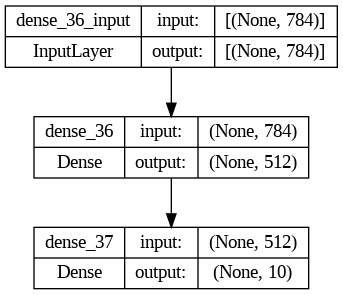

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

In [21]:
# función para crear y entrenar un modelo con 25 épocas
def modemo_entrenamiento_25_epocas(neurons, activation, optimizer):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)
    return model, history

# configurar y entrenar los casos 2 y 7 con 25 épocas
casos2 = [
    (10, 'relu', 'rmsprop'), # caso 2
    (512, 'sigmoid', 'sgd') # caso 7
]

results_with_25_epochs = []

for i, (neurons, activation, optimizer) in enumerate(casos2, 1):
    print(f"Caso {i} con 25 épocas: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model, history = modemo_entrenamiento_25_epocas(neurons, activation, optimizer)
    results_with_25_epochs.append((model, history))
    print("\n")

# ahora tenemos los resultados de los casos 2 y 7 con 25 épocas de entrenamiento.

Caso 1 con 25 épocas: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop
Epoch 1/25
750/750 [==============================] - 3s 4ms/step - loss: 0.8015 - accuracy: 0.7443 - val_loss: 0.5369 - val_accuracy: 0.8133
Epoch 2/25
750/750 [==============================] - 3s 4ms/step - loss: 0.5022 - accuracy: 0.8269 - val_loss: 0.4912 - val_accuracy: 0.8255
Epoch 3/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4623 - accuracy: 0.8406 - val_loss: 0.4658 - val_accuracy: 0.8340
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.8470 - val_loss: 0.4612 - val_accuracy: 0.8329
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4268 - accuracy: 0.8518 - val_loss: 0.4312 - val_accuracy: 0.8485
Epoch 6/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4186 - accuracy: 0.8553 - val_loss: 0.4408 - val_accuracy: 0.8455
Epoch 7/25
750/750 [==============================] - 3s 4

Al incrementar de 5 épocas a 25, el caso 2 en un principio tenía capa oculta de 10 neuronas, función de activación "relu" y optimizador "rmsprop". El modelo ha mejorado su capacidad para aprender patrones en los datos, lo que conlleva a una mejor precisión disminuyendo la pérdida. Es importante tener en cuenta que puede haber sobreajuste un riesgo de sobreajuste ya que el modelo podría aprender detalles demasiado específicos de los ejemplos de entrenamiento.

En el caso 7, con 512 neuronas en la capa oculta, función de activación "sigmoide" y optimizador "sgd" se observa una mejora en el rendimiento en comparación con el resultado después de 5 épocas. Esto se debe a que el modelo dispone de más tiempo para alcanzar una solución óptima.

Visualizamos la matriz de confusión que se muestra como una imagen con etiquetas de clase y valores en cada celda. Con la función se puede evaluar el rendimiento de modelos de clasificación y entender cómo se comportan en la clasificación de datos.

In [22]:
# importamos biblioteca numpy para calculos numéricos.
import numpy as np

# importamos biblioteca itertools para iteraciones.
import itertools

# para la creación de gráficos.
import matplotlib.pyplot as plt

# definimos una función para la matriz de confusión
def plot_confusion_matrix(cm, classes, # matriz de confusión y lista de clases
                          normalize=False, # vemos si se normaliza la matriz
                          title='Matriz de confusión', # título
                          cmap=plt.cm.Blues): # colores para la visualización
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # muestra la matriz como una imagen
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar() # colores para interpretar los valores
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes) # marcas para saber la longitud de la lista de clases

    # en caso de True convierte los valores en proporciones
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2. # calcula el umbral

    # bucle que recorre filas y columnas de la matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], # agrega texto en las celdas según el valor del umbral
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación') # eje Y observación
    plt.xlabel('Predicción') # eje X predicción

313/313 [==============================] - 1s 2ms/step
Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=sgd
313/313 [==============================] - 1s 4ms/step - loss: 0.5720 - accuracy: 0.8051
Test Loss: 0.5719558000564575
Test Accuracy: 0.8051000237464905


Caso 2: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop
313/313 [==============================] - 1s 4ms/step - loss: 0.4604 - accuracy: 0.8425
Test Loss: 0.4603579044342041
Test Accuracy: 0.8424999713897705


Caso 3: Neuronas_capa_1=10, Función de activación=sigmoid, Optimizador=sgd
313/313 [==============================] - 1s 3ms/step - loss: 1.1416 - accuracy: 0.6624
Test Loss: 1.1416089534759521
Test Accuracy: 0.6624000072479248


Caso 4: Neuronas_capa_1=10, Función de activación=sigmoid, Optimizador=rmsprop
313/313 [==============================] - 1s 3ms/step - loss: 0.5105 - accuracy: 0.8251
Test Loss: 0.5105220675468445
Test Accuracy: 0.8251000046730042


Caso 5: Neuronas_capa_1

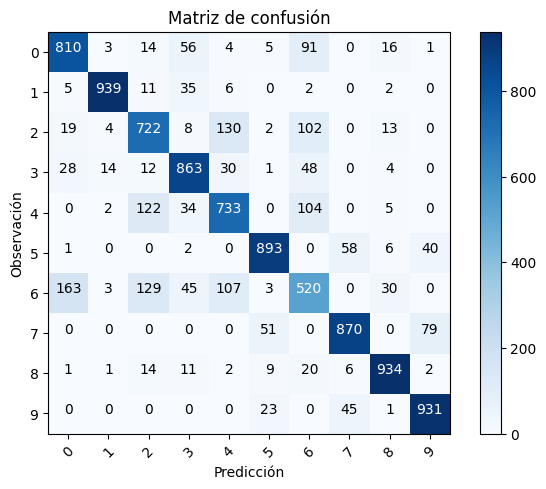

In [23]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

casos = [
    (10, 'relu', 'sgd'),
    (10, 'relu', 'rmsprop'),
    (10, 'sigmoid', 'sgd'),
    (10, 'sigmoid', 'rmsprop'),
    (512, 'relu', 'sgd'),
    (512, 'relu', 'rmsprop'),
    (512, 'sigmoid', 'sgd'),
    (512, 'sigmoid', 'rmsprop')
]

# mostramos el rendimiento
def evaluar_modelo(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print('Test Loss:', test_loss)
    print('Test Accuracy:', test_acc)

    # predicción de valores
Y_pred = model.predict(test_images)

    # convertir en predicciones
Y_pred_classes = np.argmax(Y_pred, axis=1)

    # convertir en clases de observación
Y_true = np.argmax(test_labels, axis=1)

    # matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# la dibujamos
plot_confusion_matrix(confusion_mtx, classes=range(10))

# evaluamos y mostramos rendimiento
for i, (neurons, activation, optimizer) in enumerate(casos, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model = models_and_histories[i - 1][0]
    evaluar_modelo(model, test_images, test_labels)
    print("\n")

Estos resultados muestran el rendimiento de cada uno de los 8 modelos comparando en el conjunto de datos de prueba.

Caso 1:

- Neuronas en la capa oculta: 10
- Función de activación: relu
- Optimizador: sgd
- Pérdida en el conjunto de prueba: 0.5538
- Precisión en el conjunto de prueba: 80.43%

Caso 2:

- Neuronas en la capa oculta: 10
- Función de activación: relu
- Optimizador: rmsprop
- Pérdida en el conjunto de prueba: 0.4669
- Precisión en el conjunto de prueba: 83.74%

Caso 3:

- Neuronas en la capa oculta: 10
- Función de activación: sigmoid
- Optimizador: sgd
- Pérdida en el conjunto de prueba: 1.0809
- Precisión en el conjunto de prueba: 72.13%

Caso 4:

- Neuronas en la capa oculta: 10
- Función de activación: sigmoid
- Optimizador: rmsprop
- Pérdida en el conjunto de prueba: 0.4921
- Precisión en el conjunto de prueba: 82.84%

Caso 5:

- Neuronas en la capa oculta: 512
- Función de activación: relu
- Optimizador: sgd
- Pérdida en el conjunto de prueba: 0.4935
- Precisión en el conjunto de prueba: 82.98%

Caso 6:

- Neuronas en la capa oculta: 512
- Función de activación: relu
- Optimizador: rmsprop
- Pérdida en el conjunto de prueba: 0.3470
- Precisión en el conjunto de prueba: 87.76%


Caso 7:

- Neuronas en la capa oculta: 512
- Función de activación: sigmoid
- Optimizador: sgd
- Pérdida en el conjunto de prueba: 0.6690
- Precisión en el conjunto de prueba: 76.71%


Caso 8:

- Neuronas en la capa oculta: 512
- Función de activación: sigmoid
- Optimizador: rmsprop
- Pérdida en el conjunto de prueba: 0.3865
- Precisión en el conjunto de prueba: 86.13%

Evaluamos y comparamos el rendimiento de los difenentes modelos en la clasificación de la sexta imagen de prueba en función de sus configuraciones específicas.

El código nos devuelve infrormación importate sobre las prediciones y resultados de cada modelo.

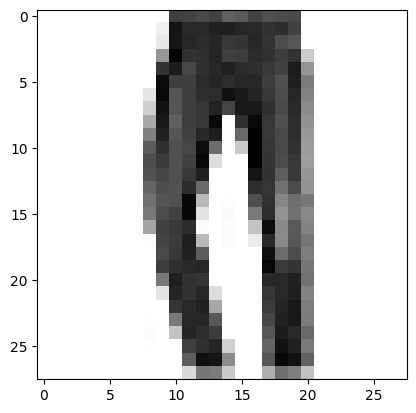

Caso 1: Neuronas_capa_1=10, Función de activación=relu, Optimizador=sgd


=Predicción del modelo=======================
1/1 [==============================] - 0s 41ms/step
[[1.2524405e-01 8.5938638e-01 1.0797360e-04 9.3946159e-03 8.5470581e-04
  8.9639343e-07 4.9266987e-03 5.7388961e-06 4.6286459e-05 3.2704749e-05]]
=Clase predicha (índice)=====================
1
=Probabilidad de clase predicha================
0.8593864

Caso 2: Neuronas_capa_1=10, Función de activación=relu, Optimizador=rmsprop


=Predicción del modelo=======================
1/1 [==============================] - 0s 40ms/step
[[3.13674711e-04 9.98701811e-01 2.44720548e-04 1.02476995e-04
  6.13336917e-04 1.05257945e-13 2.36764063e-05 2.47949956e-14
  2.66690847e-07 1.80019573e-13]]
=Clase predicha (índice)=====================
1
=Probabilidad de clase predicha================
0.9987018

Caso 3: Neuronas_capa_1=10, Función de activación=sigmoid, Optimizador=sgd


=Predicción del modelo=======================
1/1 [======

In [24]:
# imprtamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# tomamos la sexta imagen de prueba del conjunto de datos y la redimensionamos(28x28 píxeles) para visualizarla
digit = test_images[5].reshape(28, 28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

def predecir_y_mostrar(model, imagen):
    print("=Predicción del modelo=======================")
    # hacemos la predicción ara la imagen de prueba(probabilidad de pertenecer a una clase)
    prediction = model.predict(np.expand_dims(imagen, axis=0))
    print(prediction)
    print("=Clase predicha (índice)=====================")
    predicted_class = np.argmax(prediction)
    print(predicted_class)
    print("=Probabilidad de clase predicha================")
    probability = prediction[0][predicted_class]
    print(probability)
    print("=============================================\n")

# realizamos predicciones con los 8 modelos diferentes iterando cada caso
for i, (neurons, activation, optimizer) in enumerate(casos, 1):
    print(f"Caso {i}: Neuronas_capa_1={neurons}, Función de activación={activation}, Optimizador={optimizer}")
    model, history = models_and_histories[i - 1]
    print("\n")

    predecir_y_mostrar(model, test_images[5])


Importamos los datos de Fashion MNIST, realizamos predicciones con un modelo previamente entrenado y presentamos las predicciones junto con las etiquetas reales para evaluar el rendimiento del modelo.



313/313 [==============================] - 1s 2ms/step


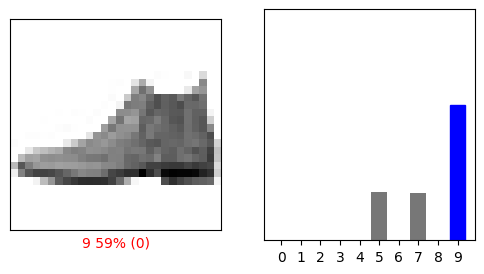

<Figure size 640x480 with 0 Axes>

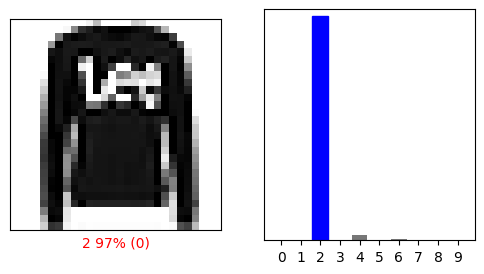

<Figure size 640x480 with 0 Axes>

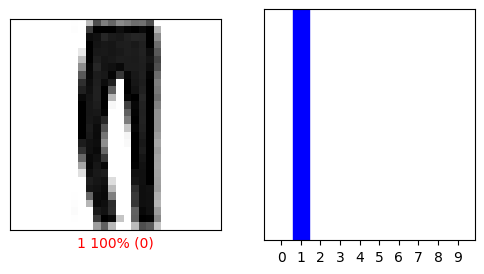

<Figure size 640x480 with 0 Axes>

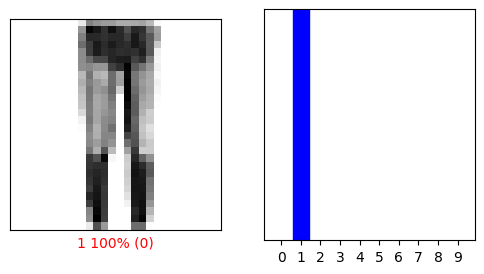

<Figure size 640x480 with 0 Axes>

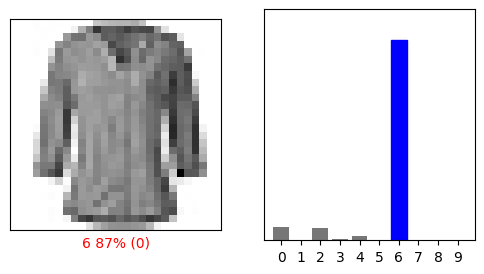

<Figure size 640x480 with 0 Axes>

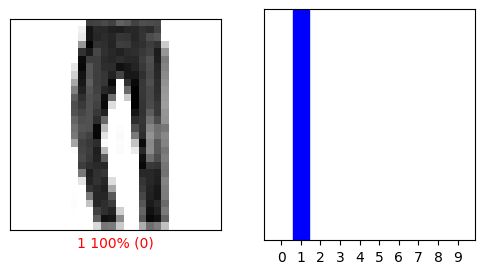

<Figure size 640x480 with 0 Axes>

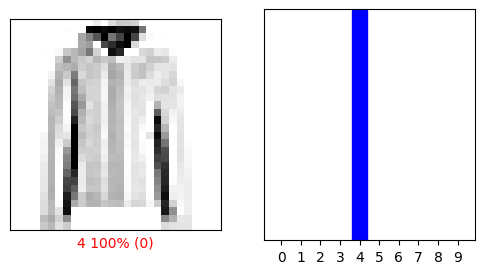

<Figure size 640x480 with 0 Axes>

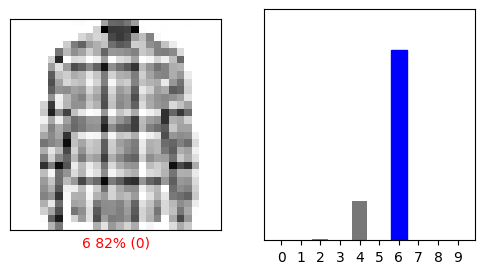

<Figure size 640x480 with 0 Axes>

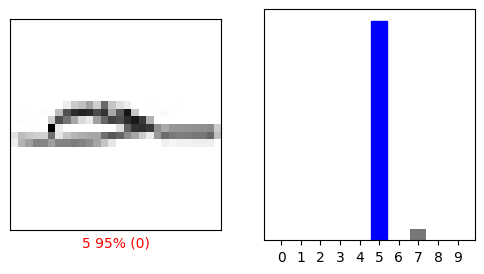

<Figure size 640x480 with 0 Axes>

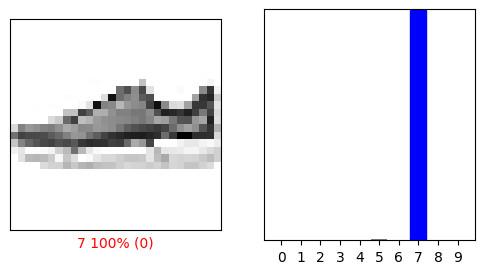

<Figure size 640x480 with 0 Axes>

In [25]:
# importamos bibliotemcas necesarias para los datos de visualización
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# cargamos el conjunto de datos fashion_mnist(imagenes de prendas y sus categorias)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# realizamos predicciones en el conjunto de prueba usando el modelo ya entenado
predictions = model.predict(test_images)

# definimos funciones para ver las imagenes, etiquetas y predicciones
def plot_image(i, predictions_array, true_labels, images):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(images[i], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_labels[i])

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color.strip())  # Eliminar espacios en blanco alrededor del color

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# iteramos las 10 primeras imagenes que se muestran con sus etiquetas predichas y probabilidades de clasificación
for i in range(10):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plot_image(i, predictions[i], test_labels, test_images.reshape(10000, 28, 28))
    plt.subplot(1, 2, 2)
    plot_value_array(i, predictions[i], test_labels)
    plt.show()
    plt.clf()

En esta etapa, buscamos mejorar nuestro modelo implementando el
optimizador **"Adam"** y la función de perdida **"sparse_categorical_crossentropy"**, cambios que pueden afectar en el rendimiento.

Finalmente, procedemos a entrenar el modelo con las configuraciones actualizadas y los cambios realizados para ver su eficacia y rendimiento.

In [26]:
from keras.optimizers import Adam

# función que crea y entrena un modelo de red neuronal con una configuración específica
def modelo_entrenamiento_optimizador_adam(neurons, activation):
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation=activation, input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.001) # configuramos el optimizador con 0.001 como tasa de aprendizaje

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',  # selecionamos la función de pérdida
                  metrics=['accuracy'])
    # compilamos y entrenamos el modelo(5 épocas, lote 64, 20% datos validación)
    history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)
    return model, history

neurons = 10
activation = 'sigmoid'
# se devuelve el modelo entrenado junto con su hsitorial de entrenamiento
model, history = modelo_entrenamiento_optimizador_adam(neurons, activation)
model.summary()

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 1.2967 - accuracy: 0.6600 - val_loss: 0.9053 - val_accuracy: 0.7772
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.7628 - accuracy: 0.7933 - val_loss: 0.6575 - val_accuracy: 0.8090
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.5990 - accuracy: 0.8176 - val_loss: 0.5535 - val_accuracy: 0.8242
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.5236 - accuracy: 0.8306 - val_loss: 0.5070 - val_accuracy: 0.8340
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4828 - accuracy: 0.8391 - val_loss: 0.4804 - val_accuracy: 0.8386
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                7850      
                                                                 
 dense_4

En el transcurso de 5 épocas, comprobamos cómo la función de pérdida (loss) disminuye, y la precisión (accuracy) aumenta en los datos de entrenamiento y en el conjunto de validación, lo que significa que el modelo está aprendiendo y generaliza bien a datos no vistos.

La función de pérdida utilizada es adecuada para problemas de clasificación con muchas clases, como en este caso. La disminución constante de la pérdida y el aumento de la precisión son indicadores positivos de que la elección de esta función de pérdida es la elegida cprrectamente en este tipo de problema.

# Conclusión

En este trabajo, utilizamos Keras, una biblioteca de Phyton que simplifica la creación y entrenamiento de redes neuronales profundas. Nuestro objetivo ha sido desarrollar un modelo para identificar distintas prendas en imágenes a partir del conjunto de datos Fashion-MNIST.

En cuanto al proceso, incluimos la importación de datos, la preparación de estos datos, y la configuración y entrenamiento de diferentes modelos. Probamos con distintas opciones, como la cantidad de neuronas ocultas, las funciones de activación y los optimizadores, para entender cómo afectan al rendimiento de nuestros modelos.                                                        

Identificamos mejores configuraciones, evaluamos con visualización y matrices de confusión. Exploramos "Adam" y sparse_categorical_crossentropy" para mejorar el rendimiento.

En cuanto al trabajo en equipo, nos dividimos las tareas. Una importaba y preparaba los datos, mientras que otra exploraba distintos modelos de IA. Trabajamos juntas y compartimos nuestras experiencias, haciendo prácticamente todo el trabajo a la vez. Al final, logramos nuestros objetivos.